##  **Credit Card Approval Analysis Project**

## **Introduction**

In today’s financial landscape, credit cards are essential tools for providing individuals with financial flexibility and access to credit. However, the process of approving credit card applications requires careful evaluation to ensure that credit is granted responsibly while minimizing risk for lenders.

This analysis focuses on building a predictive model for credit card approvals, leveraging historical applicant data to identify the key factors influencing approval decisions. By uncovering patterns and trends, this model aims to streamline the approval process, improve risk management, and ensure fair and data-driven decision-making in granting credit.

## **Analysis Objective**

The objective of this analysis is to thoroughly examine credit card application data to uncover patterns and trends that influence approval decisions. This will include creating visual summaries to highlight important applicant characteristics and their relationship to approval outcomes. The next step is to build a machine learning model capable of predicting the likelihood of approval for new applications. By identifying these factors, this analysis will provide valuable insights to enhance decision-making and streamline the credit approval process.

## **Data Description**

The dataset contains applicant demographics, financial attributes, and credit history details.

## **Data Dictionary**

The dataset includes the following columns:
- `Male`, `Age`, `Married`, `Ethnicity`: Demographic information about applicants.
- `Debt`, `YearsEmployed`, `Income`, `CreditScore`: Financial attributes reflecting the applicant's financial status.
- `PriorDefault`, `Employed`, `DriversLicense`, `Citizen`: Credit history and other relevant characteristics.
- `EducationLevel`, `BankCustomer`, `ZipCode`: Additional applicant details.
- `Approved`: Target variable indicating whether the application was approved (+ or -).

## **Data Import and Data Cleaning**

#### **Importing the required libraries**

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### **Importing and understanding the structure of the data**

In [ ]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [ ]:
# Import the dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

In [ ]:
# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

In [ ]:
# returns the first 5 rows
X.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b


In [ ]:
# returns the first 5 rows
y.head()

,A16
0,+
1,+
2,+
3,+
4,+


**Observation:**

The column names do not currently match those in the data dictionary. These need to be updated to reflect the names specified in the data dictionary.

In [ ]:
X = X.copy()  # Create a copy of the DataFrame
X = X.rename(columns={
    'A1': 'Male',
    'A2': 'Age',
    'A3': 'Debt',
    'A4': 'Married',
    'A5': 'BankCustomer',
    'A6': 'EducationLevel',
    'A7': 'Ethnicity',
    'A8': 'YearsEmployed',
    'A9': 'PriorDefault',
    'A10': 'Employed',
    'A11': 'CreditScore',
    'A12': 'DriversLicense',
    'A13': 'Citizen',
    'A14': 'ZipCode',
    'A15': 'Income'})

In [ ]:
y = y.copy()  # Create a copy of the DataFrame
y = y.rename(columns={'A16': 'Approved'})

In [ ]:
X.head()

,Income,ZipCode,Citizen,DriversLicense,CreditScore,Employed,PriorDefault,YearsEmployed,Ethnicity,EducationLevel,BankCustomer,Married,Debt,Age,Male
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b


In [ ]:
y.head()

,Approved
0,+
1,+
2,+
3,+
4,+


**Observation:**

The column names have been updated to match the descriptions provided in the data dictionary.

In [ ]:
# merge both data
merged_data = pd.concat([X, y], axis=1)
print(merged_data)

     Income  ZipCode Citizen DriversLicense  CreditScore Employed  \
0         0    202.0       g              f            1        t   
1       560     43.0       g              f            6        t   
2       824    280.0       g              f            0        f   
3         3    100.0       g              t            5        t   
4         0    120.0       s              f            0        f   
..      ...      ...     ...            ...          ...      ...   
685       0    260.0       g              f            0        f   
686     394    200.0       g              t            2        t   
687       1    200.0       g              t            1        t   
688     750    280.0       g              f            0        f   
689       0      0.0       g              t            0        f   

    PriorDefault  YearsEmployed Ethnicity EducationLevel BankCustomer Married  \
0              t           1.25         v              w            g       u   
1        

#### **Understanding the Data**

**Let's see the number of rows and columns present in the data**

In [ ]:
# Get the number of rows and columns
rows, columns = merged_data.shape

print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 690 rows and 16 columns.


**Let's see the data types of the columns in the dataset**

In [ ]:
# Display the datatypes of the different columns
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          690 non-null    int64  
 1   ZipCode         677 non-null    float64
 2   Citizen         690 non-null    object 
 3   DriversLicense  690 non-null    object 
 4   CreditScore     690 non-null    int64  
 5   Employed        690 non-null    object 
 6   PriorDefault    690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   Ethnicity       681 non-null    object 
 9   EducationLevel  681 non-null    object 
 10  BankCustomer    684 non-null    object 
 11  Married         684 non-null    object 
 12  Debt            690 non-null    float64
 13  Age             678 non-null    float64
 14  Male            678 non-null    object 
 15  Approved        690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


**Observations:**

The dataset has 690 entries and 16 columns. The columns `Income` and `CreditScore` are integers (int64). `ZipCode`, `YearsEmployed`, `Debt`, `Age` are float data types (flot64), while `Citizen`, `DriversLicense`, `Employed`, `PriorDefault`, `Ethnicity`, `EducationLevel`, `BankCustomer`, `Married`, `Male`, `Approved` are object data types (object). The dataset uses approximately 86.4+ KB of memory.

#### **Let's Check for missing values or inconsistencies and handle them appropriately.**

In [ ]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Income             0
ZipCode           13
Citizen            0
DriversLicense     0
CreditScore        0
Employed           0
PriorDefault       0
YearsEmployed      0
Ethnicity          9
EducationLevel     9
BankCustomer       6
Married            6
Debt               0
Age               12
Male              12
Approved           0
dtype: int64


**Observation:**

Seven (7) columns in total contains missing values.

`ZipCode` contains 13 missing values, `Ethnicity` contains 9 missing values, `EducationLevel` contains 9 missing values, `BankCustomer` contains 6 missing values, `Married` contains 6 missing values, `Age` contains 12 missing values, and `Male` contains 12 missing values

**Let's handle the missing values**

In [ ]:
# For ZipCode
merged_data['ZipCode'] = merged_data['ZipCode'].fillna(merged_data['ZipCode'].mean())

In [ ]:
# For Ethnicity, it is a categorical column and further deep-dive into the data showed that it contains cells with "?"
# First, convert cells with "?" to NaN
merged_data['Ethnicity'] = merged_data['Ethnicity'].replace('?', pd.NA)

# Replace the missing values with the mode of the column
merged_data['Ethnicity'] = merged_data['Ethnicity'].fillna(merged_data['Ethnicity'].mode()[0])

In [ ]:
# For EducationLevel, it is a categorical column and further deep-dive into the data showed that it contains cells with "?"
# First, convert cells with "?" to NaN
merged_data['EducationLevel'] = merged_data['EducationLevel'].replace('?', pd.NA)

# Replace the missing values with the mode of the column
merged_data['EducationLevel'] = merged_data['EducationLevel'].fillna(merged_data['EducationLevel'].mode()[0])

In [ ]:
# For BankCustomer, it is a categorical column and further deep-dive into the data showed that it contains cells with "?"
# First, convert cells with "?" to NaN
merged_data['BankCustomer'] = merged_data['BankCustomer'].replace('?', pd.NA)

# Replace the missing values with the mode of the column
merged_data['BankCustomer'] = merged_data['BankCustomer'].fillna(merged_data['BankCustomer'].mode()[0])

In [ ]:
# For Married, it is a categorical column and further deep-dive into the data showed that it contains cells with "?"
# First, convert cells with "?" to NaN
merged_data['Married'] = merged_data['Married'].replace('?', pd.NA)

# Replace the missing values with the mode of the column
merged_data['Married'] = merged_data['Married'].fillna(merged_data['Married'].mode()[0])

In [ ]:
# For Age
merged_data['Age'] = merged_data['Age'].fillna(merged_data['Age'].mean())

In [ ]:
# For Male, it is a categorical column and further deep-dive into the data showed that it contains cells with "?"
# First, convert cells with "?" to NaN
merged_data['Male'] = merged_data['Male'].replace('?', pd.NA)

# Replace the missing values with the mode of the column
merged_data['Male'] = merged_data['Male'].fillna(merged_data['Male'].mode()[0])

In [ ]:
# Verifying the dataset to ensure all missing values have been filled
missing_values = merged_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

data_info = merged_data.info()
print("\nDataset information:")
print(data_info)

Missing values in each column:
Income            0
ZipCode           0
Citizen           0
DriversLicense    0
CreditScore       0
Employed          0
PriorDefault      0
YearsEmployed     0
Ethnicity         0
EducationLevel    0
BankCustomer      0
Married           0
Debt              0
Age               0
Male              0
Approved          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          690 non-null    int64  
 1   ZipCode         690 non-null    float64
 2   Citizen         690 non-null    object 
 3   DriversLicense  690 non-null    object 
 4   CreditScore     690 non-null    int64  
 5   Employed        690 non-null    object 
 6   PriorDefault    690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   Ethnicity       690 non-null    object 
 9   EducationLevel  690 non-null   

**Observation:**

All missing values have been filled, and each column now contains 690 records. The dataset is clean and ready for further analysis.

## **Summary Statistics: Generate summary statistics for numerical columns to get an overview of the data**

In [ ]:
# Summary statistics to understand the distribution of the data
summary_statistics = merged_data.describe()
print("The statistical summary of the data:")
print(summary_statistics)

The statistical summary of the data:
              Income      ZipCode  CreditScore  YearsEmployed        Debt  \
count     690.000000   690.000000    690.00000     690.000000  690.000000   
mean     1017.385507   184.014771      2.40000       2.223406    4.758725   
std      5210.102598   172.159274      4.86294       3.346513    4.978163   
min         0.000000     0.000000      0.00000       0.000000    0.000000   
25%         0.000000    80.000000      0.00000       0.165000    1.000000   
50%         5.000000   160.000000      0.00000       1.000000    2.750000   
75%       395.500000   272.000000      3.00000       2.625000    7.207500   
max    100000.000000  2000.000000     67.00000      28.500000   28.000000   

              Age  
count  690.000000  
mean    31.568171  
std     11.853273  
min     13.750000  
25%     22.670000  
50%     28.625000  
75%     37.707500  
max     80.250000  


**Observations:**

**Income:**
- The dataset contains 690 records, with no missing values.
- The average income is 1,017.39, but the values show an extremely wide range from 0 to 100,000.
- Half of the applicants have an income of 5 or less, and a quarter of them report no income at all, which might reflect unemployed or lower-income individuals.
- The upper 25% of the income distribution starts at 395.50, showing a sharp income disparity in the dataset.

**CreditScore:**

- The mean credit score is 2.4, with a standard deviation of 4.86, indicating a wide range of scores from 0 to 67.
- Half of the applicants have a credit score of 0, meaning a significant portion of the dataset lacks a formal credit history or has a score too low to report.

**Years Employed:**

- The average employment duration is 2.22 years, with a maximum of 28.5 years.
- Half of the individuals have been employed for 1 year or less, and a quarter has been employed for 0.165 years or less, suggesting many applicants are relatively new to their jobs.

**Debt:**

- The mean debt is 4.76, with a wide spread from 0 to 28.
- Half of the applicants have a debt of 2.75 or less, while the upper 25% of debtors have at least 7.21, indicating a subgroup with significantly higher debt levels.

**Age:**

- The dataset covers ages ranging from 13.75 (likely an error or special case) to 80.25 years, with an average of 31.57 years.
- Half of the individuals are 28.63 years or younger, while the upper 25% start at 37.71 years, indicating a relatively young population overall.


##  **Exploratory Data Analysis (EDA)**

- **Perform univariate analysis to explore each variable individually (e.g., histograms,boxplots).**


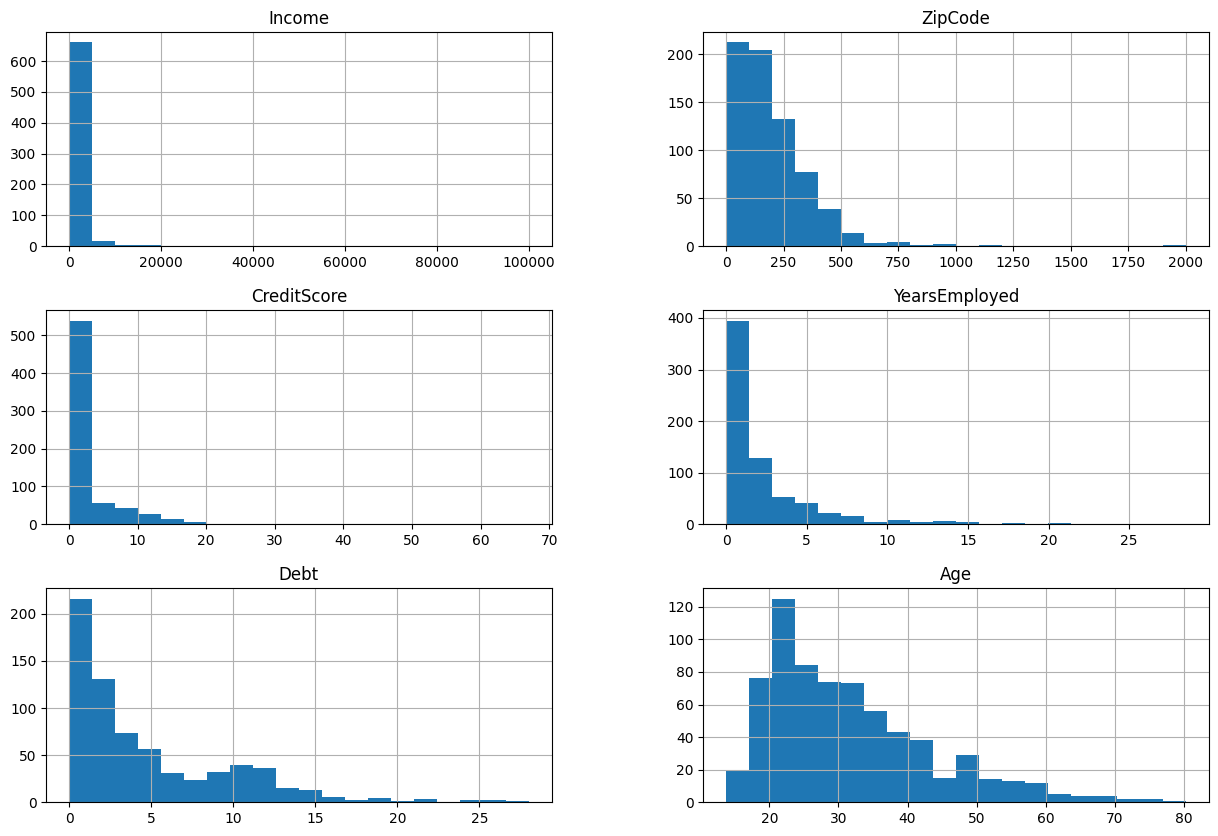

In [ ]:
# For numerical variables
merged_numerical = merged_data.select_dtypes(include=['int64', 'float64'])
merged_numerical.hist(figsize=(15,10), bins=20)

# plt.tight_layout()
plt.show()

**Observation:**

The charts above displays the distribution of numeric variables:

- **Income:** Most individuals have an income concentrated in a lower range, with very few earning in the higher ranges (over 20,000).

- **Credit Score:** A significant majority of individuals have very low credit score, clustered around 0 and 10. Also, there is a decline in frequency as credit scores increase, with almost no entries beyond 20.

- **Years Employed:** Most individuals in the dataset have been employed for 0 to 15 years. Very few data points represent individuals with more than 10 years of employment, suggesting this might be a younger demographic or those new to the workforce.

- **Debt:** Debt levels are concentrated at the lower end, with most values between 0 and 5. Some individuals have debts extending beyond 10, but these are much less frequent.

- **Age:** Age distribution seems to be concentrated around 20 to 40, with the highest frequency in the late 20s to early 30s. There is a steady decline in frequency as age increases, with very few individuals older than 60.

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


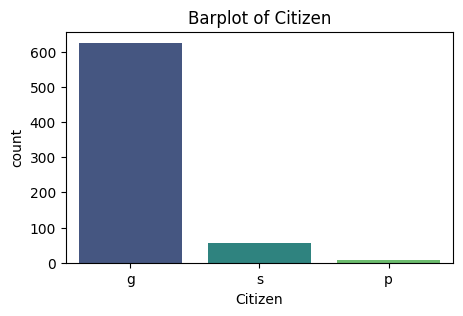

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


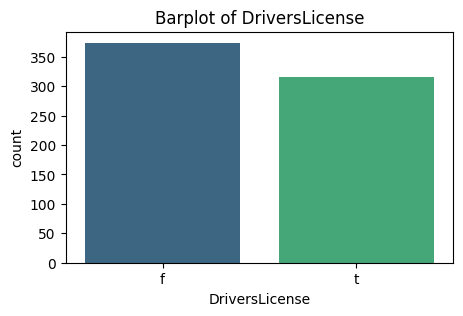

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


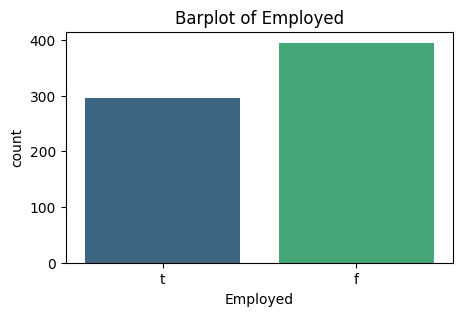

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


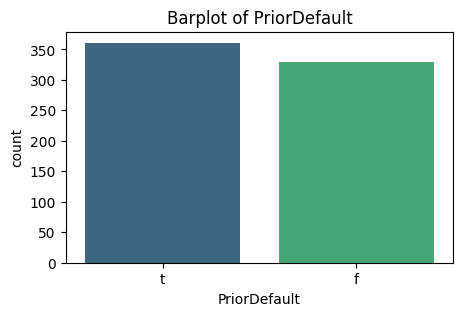

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


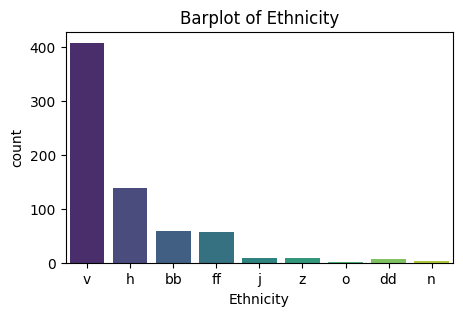

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


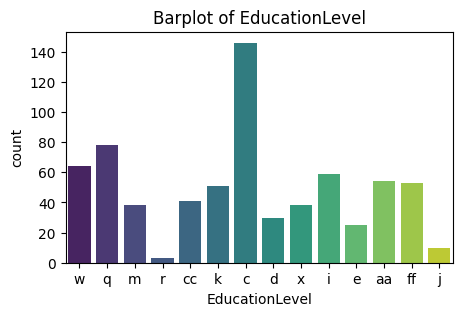

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


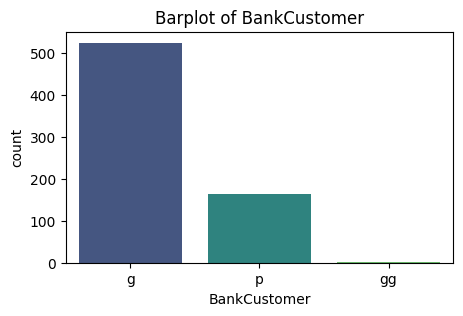

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


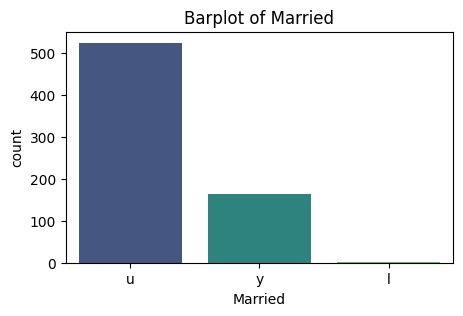

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


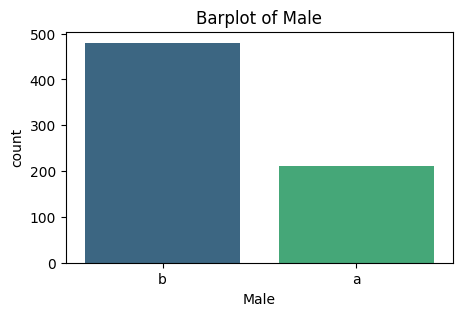

<ipython-input-25-92aa636274af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_categorical, palette = 'viridis')


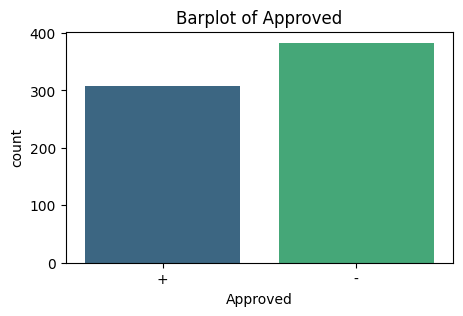

In [ ]:
# For categorical variables
merged_categorical = merged_data.select_dtypes(include=['object'])
for col in merged_categorical.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=merged_categorical, palette = 'viridis')
    plt.title(f'Barplot of {col}')
    plt.show()

**Observations:**

These barplots depicts the distribution of categorical variables in the dataset.

- **Citizen:** Categories like "g","s", and "p" is assumed to represent types of citizenship status. The majority of individuals belong to category "g", with significantly fewer in "s" and "p".

- **Drivers License:** Categories "t" (true) and "f" (false) is assumed to show whether individuals posses a driver's license. The counts are fairly balanced between who have a driver's license and those who don't.

- **Employed Individuals:** Categories "t" (true) and "f" is assumed to indicate employment status. More individuals are unemployed ("f") compared to those employed ("t").

- **Prior Default:** Categories "t" and "f" represent whether the individual has a history of defaulting. The data shows a fairly even split between those with and without prior defaults.

- **Ethnicity:** Various categories such as "v," "h," "b," etc., is assumed to represent different ethnic groups. Most individuals fall into the "v" category, while others are distributed sparsely among the remaining categories.

- **Education Level:**  Categories such as "w," "q," "m," etc., is assumed to represent levels of education.  Most individuals belong to the "c" category with other more frequent categories, while others are less common, indicating a distribution favoring certain education levels.

- **Bank Customer:** Categories "g," "p," and "gg" represent customer types or codes. Most individuals belong to the "g" category, while the other two have much smaller representations.

- **Married:** Categories "u," "y," and "l" show marital status. Most individuals are in the "u" category (possibly unmarried), with fewer in "y" (possibly married).

- **Male:** Categories "b" and "a" might represent male and female identifiers. There are more individuals in the "b" category.

- **Approved:** Categories "+" and "-" indicate whether a loan or credit application was approved or not. The counts are nearly equal, suggesting balanced outcomes.


- **Perform multivariate analysis to understand relationships between variables (e.g.,correlation matrix, scatterplots).**

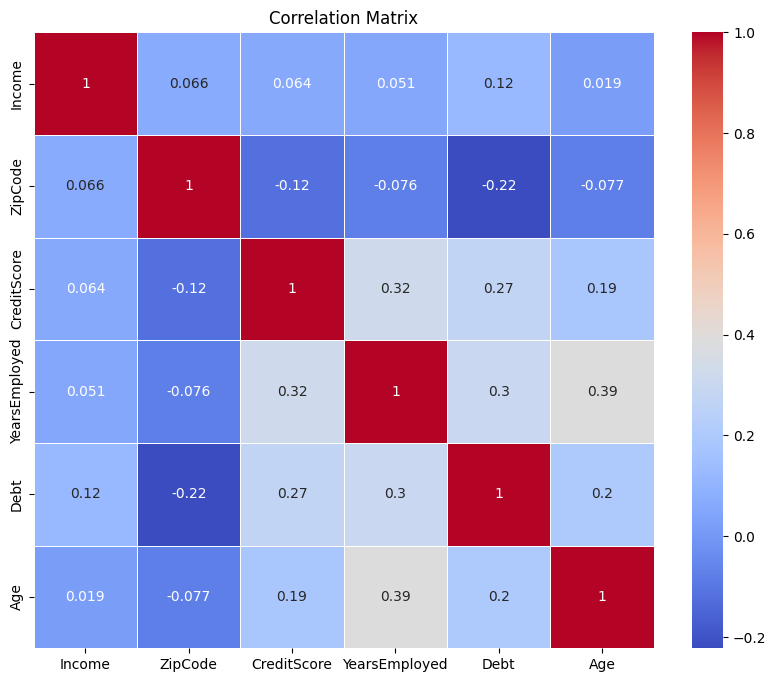

In [ ]:
# Correlation Matrix for numerical variables
correlation_matrix = merged_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Observations:**

 - **CreditScore and YearsEmployed (correlation 0.32)**: These variables have a moderate positive correlation, suggesting that more years employed might correspond to a better credit score.

- **Debt and YearsEmployed (correlation 0.3)**: A positive correlation indicates that longer employment may be linked to higher debt.

- **Debt and CreditScore (correlation 0.27):** There is a mild positive correlation, suggesting individuals with higher debt might also have slightly better credit scores.

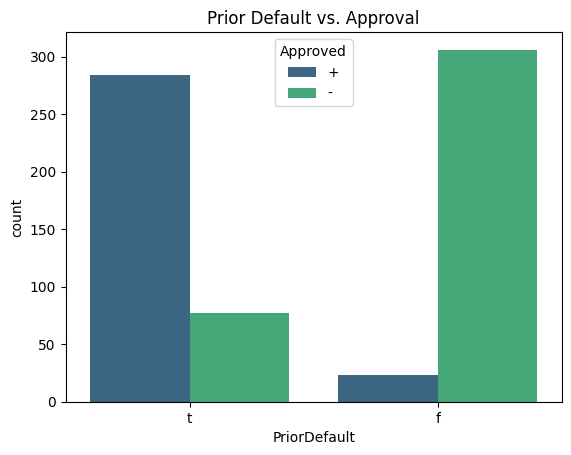

In [ ]:
# Does Prior Default affect the approval of a loan/credit card?

sns.countplot(data=merged_data, x='PriorDefault', hue='Approved',  palette = 'viridis')
plt.title('Prior Default vs. Approval')
plt.show()

**Observations:**

- Applicants with no prior defaults (f) are predominantly not approved (-), as shown by the taller green bar in this group.
- Applicants with prior defaults (t) are more likely to be approved (+), indicated by the taller blue bar in this category.
- It is surprising to see that there is a stark contrast between approval outcomes for applicants with and without prior defaults.

This indicates that prior defaults strongly influence the approval decision, and the trend might suggest either stricter rules or risk factors associated with no prior defaults. Further analysis could clarify why this is happening.

## **Feature Engineering**

In [ ]:
# import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

**Encode categorical variables numerically for model compatibility using LabelEncoder from sklearn.**

In [ ]:
model_data = merged_data.copy()

encorder = LabelEncoder()
model_data['Male'] = encorder.fit_transform(model_data['Male'])
model_data['Married'] = encorder.fit_transform(model_data['Married'])
model_data['Ethnicity'] = encorder.fit_transform(model_data['Ethnicity'])
model_data['BankCustomer'] = encorder.fit_transform(model_data['BankCustomer'])
model_data['EducationLevel'] = encorder.fit_transform(model_data['EducationLevel'])
model_data['PriorDefault'] = encorder.fit_transform(model_data['PriorDefault'])
model_data['Employed'] = encorder.fit_transform(model_data['Employed'])
model_data['DriversLicense'] = encorder.fit_transform(model_data['DriversLicense'])
model_data['Citizen'] = encorder.fit_transform(model_data['Citizen'])
model_data['Approved'] = encorder.fit_transform(model_data['Approved'])

In [ ]:
model_data.head()

,Income,ZipCode,Citizen,DriversLicense,CreditScore,Employed,PriorDefault,YearsEmployed,Ethnicity,EducationLevel,BankCustomer,Married,Debt,Age,Male,Approved
0,0,202.0,0,0,1,1,1,1.25,7,12,0,1,0.000,30.83,1,0
1,560,43.0,0,0,6,1,1,3.04,3,10,0,1,4.460,58.67,0,0
2,824,280.0,0,0,0,0,1,1.50,3,10,0,1,0.500,24.50,0,0
3,3,100.0,0,1,5,1,1,3.75,7,12,0,1,1.540,27.83,1,0
4,0,120.0,2,0,0,0,1,1.71,7,12,0,1,5.625,20.17,1,0


**Separate the data into features (X) and labels (y)**

In [ ]:
# Define features and target
model_data_X = model_data.drop('Approved', axis=1)
model_data_y = model_data['Approved']

In [ ]:
model_data_X.head()

,Income,ZipCode,Citizen,DriversLicense,CreditScore,Employed,PriorDefault,YearsEmployed,Ethnicity,EducationLevel,BankCustomer,Married,Debt,Age,Male
0,0,202.0,0,0,1,1,1,1.25,7,12,0,1,0.000,30.83,1
1,560,43.0,0,0,6,1,1,3.04,3,10,0,1,4.460,58.67,0
2,824,280.0,0,0,0,0,1,1.50,3,10,0,1,0.500,24.50,0
3,3,100.0,0,1,5,1,1,3.75,7,12,0,1,1.540,27.83,1
4,0,120.0,2,0,0,0,1,1.71,7,12,0,1,5.625,20.17,1


In [ ]:
model_data_y.head()

,Approved
0,0
1,0
2,0
3,0
4,0


**Standardize the feature values using MinMaxScaler from sklearn.**

In [ ]:
# Normalize data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(model_data_X)
X_normalize = pd.DataFrame(X_scaled, columns=model_data_X.columns)
X_normalize.head()

,Income,ZipCode,Citizen,DriversLicense,CreditScore,Employed,PriorDefault,YearsEmployed,Ethnicity,EducationLevel,BankCustomer,Married,Debt,Age,Male
0,0.00000,0.1010,0.0,0.0,0.014925,1.0,1.0,0.043860,0.875,0.923077,0.0,0.5,0.000000,0.256842,1.0
1,0.00560,0.0215,0.0,0.0,0.089552,1.0,1.0,0.106667,0.375,0.769231,0.0,0.5,0.159286,0.675489,0.0
2,0.00824,0.1400,0.0,0.0,0.000000,0.0,1.0,0.052632,0.375,0.769231,0.0,0.5,0.017857,0.161654,0.0
3,0.00003,0.0500,0.0,1.0,0.074627,1.0,1.0,0.131579,0.875,0.923077,0.0,0.5,0.055000,0.211729,1.0
4,0.00000,0.0600,1.0,0.0,0.000000,0.0,1.0,0.060000,0.875,0.923077,0.0,0.5,0.200893,0.096541,1.0


**Let's check the skewness of the normalized data**

In [ ]:
X_normalize.skew()

,0
Income,13.140655
ZipCode,2.749907
Citizen,2.904557
DriversLicense,0.169081
CreditScore,5.152520
Employed,0.293587
PriorDefault,-0.093056
YearsEmployed,2.891330
Ethnicity,-0.755319
EducationLevel,0.213233


**Observation:**

There are about Five (5) columns with extreme skewed data. The columns are `Income` with skewness of 13.14, `ZipCode` with skewness of 2.74, `Citizen` with skewness of 2.90, `CreditScore` with skewness of 5.15 and `YearsEmployed` with skewness of 2.89

In [ ]:
# Let's try to minimize the skewness using square root
import math
X_normalize['Income'] = np.sqrt(X_normalize['Income'])
X_normalize['ZipCode'] = np.sqrt(X_normalize['ZipCode'])
X_normalize['Citizen'] = np.sqrt(X_normalize['Citizen'])
X_normalize['CreditScore'] = np.sqrt(X_normalize['CreditScore'])

In [ ]:
X_normalize.skew()

,0
Income,4.399326
ZipCode,-0.145080
Citizen,2.831497
DriversLicense,0.169081
CreditScore,1.325196
Employed,0.293587
PriorDefault,-0.093056
YearsEmployed,2.891330
Ethnicity,-0.755319
EducationLevel,0.213233


**Observation:**

Applying square root transformation to highly skewed columns significantly reduced their skewness. While some columns still exhibit moderate skewness, it is much improved compared to their original state. The updated skewness values are as follows:

- `Income`: Reduced to 4.39, still slightly skewed.
- `ZipCode`: Adjusted to -0.14, indicating near symmetry.
- `Citizen`: Reduced to 2.83, showing moderate skewness.
- `CreditScore`: Improved to 1.32, nearing normal distribution.
- `YearsEmployed`: Adjusted to 2.89, with moderate skewness remaining.

These transformations enhance the data's suitability for modeling and improve overall analysis accuracy.

**Split the dataset into training (80%) and testing (20%) subsets using the train_test_split function.**
-   **Set random_state=42 to ensure reproducibility.**

In [ ]:
X_normalize_train, X_normalize_test, model_data_y_train, model_data_y_test = train_test_split(X_normalize, model_data_y, test_size=0.2, random_state=42)

## **Model Building**

 **Build a Logistic Regression model using Logistic Regression from sklearn**

In [ ]:
# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_normalize_train, model_data_y_train)

LogisticRegression()

**Train the model on the full train dataset (without feature selection).**

In [ ]:
prediction = model.predict(X_normalize_test)

In [ ]:
prediction

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0])

**Apply variance thresholding to reduce low-variance features from the dataset**.

In [ ]:
# Import the var thresh model and choose a threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.02)

# Transform (i.e.: run selection on) the training data
X_train_vt = selector.fit_transform(X_normalize_train)

In [ ]:
X_normalize_train.shape

(552, 15)

In [ ]:
X_train_vt.shape

(552, 13)

**Observation:**

Using a variance threshold of 0.02, we have managed to trim the number of features in the training dataset from 15 to 13.

**Train another Logistic Regression model using the reduced dataset(post-variance thresholding).**

In [ ]:
# Train a Logistic Regression Model
model_vt = LogisticRegression()

In [ ]:
# Fit model to the transformed data
model_vt.fit(X_train_vt, model_data_y_train)

LogisticRegression()

In [ ]:
# Now we'll need to remove the same features we did in the thresholding process
X_test_vt = selector.transform(X_normalize_test)

In [ ]:
X_normalize_test.shape

(138, 15)

In [ ]:
X_test_vt.shape

(138, 13)

**Use both models to predict the target values for the testing dataset.**

In [ ]:
# Prediction from the full train data set
prediction = model.predict(X_normalize_test)

# Generate predictions from var thresh model
prediction_vt = model_vt.predict(X_test_vt)

## **Model Evaluation**

**Compare the performance of the full dataset model and the variance-thresholded dataset model.**

**Measure the performance of each model using:**
- **Confusion Matrix: Evaluate the classification performance.**
- **Classification Report: Analyze precision, recall, F1-score, and support for each class.**
- **Accuracy Score: Compare the overall accuracy of the two models.**

In [ ]:
# Evaluate the classification performance
# Confusion Matrix - Full train data
confusion_matrix(model_data_y_test, prediction)
labels = ['0: Not Approved', '1: Approved']
pd.DataFrame(data=confusion_matrix(model_data_y_test, prediction), index=labels, columns=labels)

,0: Not Approved,1: Approved
0: Not Approved,62,8
1: Approved,14,54


In [ ]:
# Confusion Matrix - Variance Threshold
confusion_matrix(model_data_y_test, prediction_vt)
labels = ['0: Not Approved', '1: Approved']
pd.DataFrame(data=confusion_matrix(model_data_y_test, prediction_vt), index=labels, columns=labels)

,0: Not Approved,1: Approved
0: Not Approved,61,9
1: Approved,15,53


**Observations:**

The models gave different outputs.

**Model 1: Full Data Set:**

- **True Positives (TP):** Cases correctly predicted as "Approved" (54).

-  **True Negatives (TN):** Cases correctly predicted as "Not Approved" (62).

- **False Positives (FP):** Cases incorrectly predicted as "Approved" but are actually "Not Approved" (8).

- **False Negatives (FN):** Cases incorrectly predicted as "Not Approved" but are actually "Approved" (14).

**Model 2: Variance-Threshold Filtered Dataset:**

- **True Positives (TP):** Cases correctly predicted as "Approved" (53).

-  **True Negatives (TN):** Cases correctly predicted as "Not Approved" (61).

- **False Positives (FP):** Cases incorrectly predicted as "Approved" but are actually "Not Approved" (9).

- **False Negatives (FN):** Cases incorrectly predicted as "Not Approved" but are actually "Approved" (15).

In summary, Model 1 (trained on the full dataset) appears to outperform Model 2 (trained on the variance-threshold filtered dataset).

In [ ]:
# Classification Report - Precision, Recall, F1-Score
# Classification Report - Full train data
print('Classification Report')
print(classification_report(model_data_y_test, prediction, target_names=['0: Not Approved', '1: Approved']))

Classification Report
                 precision    recall  f1-score   support

0: Not Approved       0.82      0.89      0.85        70
    1: Approved       0.87      0.79      0.83        68

       accuracy                           0.84       138
      macro avg       0.84      0.84      0.84       138
   weighted avg       0.84      0.84      0.84       138



In [ ]:
# Classification Report - Variance Threshold
print('Classification Report_vt')
print(classification_report(model_data_y_test, prediction_vt, target_names=['0: Not Approved', '1: Approved']))

Classification Report_vt
                 precision    recall  f1-score   support

0: Not Approved       0.80      0.87      0.84        70
    1: Approved       0.85      0.78      0.82        68

       accuracy                           0.83       138
      macro avg       0.83      0.83      0.83       138
   weighted avg       0.83      0.83      0.83       138



**Observations:**

**Model 1: Full Dataset**

**Precision:**
- **Not Approved (0)**: 82% of prediction as "Not Approved" are correct
- **Approved (1)**: 87% of predictions as "Approved" are correct.
- High precision for "Approved" indicates that the model is good at avoiding false approvals.

**Recall:**

- **Not Approved (0)**: 89% of actual "Not Approved" cases were identified correctly.
- **Approved (1)**: 79% of actual "Approved" cases were identified correctly.
- Lower recall for "Approved" indicates the model misses some approved cases (false negatives).

**F1-Score:**

- Slightly higher for "Not Approved" (0.85) compared to "Approved" (0.83).

**Accuracy:**

- The model achieved an accuracy of 84%.

**Model 2: Variance-Threshold Variance Dataset**

**Precision:**
- **Not Approved (0)**: 80% of prediction as "Not Approved" are correct
- **Approved (1)**: 85% of predictions as "Approved" are correct.
- High precision for "Approved" indicates that the model is good at avoiding false approvals.

**Recall:**

- **Not Approved (0)**: 87% of actual "Not Approved" cases were identified correctly.
- **Approved (1)**: 78% of actual "Approved" cases were identified correctly.
- Lower recall for "Approved" indicates the model misses some approved cases (false negatives).

**F1-Score:**

- Slightly higher for "Not Approved" (0.84) compared to "Approved" (0.82).

**Accuracy:**

- The model achieved an accuracy of 83%.

**Key Insights**

- The model's accuracy decreased from 84% to 83% when using the variance threshold for feature selection. Precision, recall, and F1-scores also slightly dropped.

- "Not Approved" maintained relatively better recall across both models, indicating that the model consistently identifies "Not Approved" cases. "Approved" on the other hand showed a slightly drop in recall and F1-score in the variance threshold model compared to the full train data.

- The full tain data model performed  better accross all metrics.